## Titanic 

### Data Cleaning 

In [3]:
import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn import svm
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt

import math
import warnings
%matplotlib inline 

In [83]:
names = [
                    "PassengerId", 
                     "Survived",
                     "Pclass",
                     "Name",
                     "Sex",
                     "Age",
                     "SibSp",
                     "Parch",
                     "Ticket",
                     "Fare",
                     "Cabin",
                     "Embarked"
        ]

In [84]:
#ground_truth of data
train = pd.read_csv("train.csv",na_values="?")
test = pd.read_csv("test.csv",na_values="?")

In [85]:
#copies of data
train_copy = train.copy(deep=True)
test_copy = test.copy(deep = True)

In [86]:
data_arr = [train_copy,test_copy]

In [87]:
train_copy.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [88]:
test_copy.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [89]:
num_samples=train_copy.shape[0]
num_attributes = train_copy.shape[1]

In [90]:
print ("The titanic dataset contains {} observations".format(num_samples))
print ("The titanic dataset contains {} attributes".format(num_attributes))

The titanic dataset contains 891 observations
The titanic dataset contains 12 attributes


There seem to be columns within the trainning and test data that consists of NaN values

In [91]:

print("Training data")
print (train_copy.isnull().sum())
print("-"*10)
print("Testing data")
print(test_copy.isnull().sum())

Training data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Testing data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Let's clean those values up! 

A good method to fill in NaN values is to use the median or the mode

In [92]:
# clean the data ~> get ride of NaN values
for data in data_arr:
    
    data['Age'].fillna(data['Age'].median(),inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
    data['Fare'].fillna(data['Fare'].median(),inplace=True)


The problem statement suggests that we should drop 'PassengerId', "Cabin' ,'Ticket'

In [93]:
#per the rules; we are supposed to drop cabin number from training set
drop_columns = ["PassengerId","Cabin","Ticket"]
train_copy.drop(drop_columns,axis = 1,inplace=True)
test_copy.drop(drop_columns,axis=1,inplace=True)

Let's double check that our data cleaning worked!

In [94]:
#double check the cleaning went as planned
print("Training data")
print (train_copy.isnull().sum())
print("-"*10)
print("Testing data")
print(test_copy.isnull().sum())

Training data
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Testing data
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


These shapes check out, since the training dataframe still has the 'Survived' Column

In [95]:
#train_copy still has the 'survived' column
print(train_copy.shape)
print(test_copy.shape)

(891, 9)
(418, 8)


We still have to deal with the 'Object" type columns...

They will throw errors for the majority of algorithms that we want to apply to the dataset!

In [96]:
#We will have to perform feature mapping on the 'object' type columns
print("Training data information")
train_copy.info()
print("-"*10)
print("Testing data information")
test_copy.info()

Training data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
----------
Testing data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


Let's explore some feature engineering! 

We hypothesize that the title along with family size greatly affect an individual's chances of survival!

In [97]:
#feature engineering
for d in data_arr:
    
    #family size
    d['FamilySize'] = d['SibSp'] + d['Parch'] + 1
    d['IsAlone'] = 1
    
    d['IsAlone'].loc[d['FamilySize'] > 1] = 0
    
    #title
    d["Title"] = d['Name'].str.split(",",expand=True)[1].str.split('.',expand=True)[0]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Can never be to careful when it comes to double checking your work!

We also notice that there are alot of 'misc' titles..... Which should we worry about?

In [98]:
#double check the cleaning went as planned
print("Training data information")
print(train_copy["Title"].value_counts())

Training data information
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Sir               1
 Capt              1
 Lady              1
 Ms                1
 the Countess      1
 Jonkheer          1
 Mme               1
 Don               1
Name: Title, dtype: int64


Let's only consider the titles that occur greateer than 10 times!

In [99]:
#eliminate misc titles
min_occurences = 10
#creates a series indexed by title
title_names  = (train_copy['Title'].value_counts() > min_occurences)
print(title_names)

 Mr               True
 Miss             True
 Mrs              True
 Master           True
 Dr              False
 Rev             False
 Col             False
 Mlle            False
 Major           False
 Sir             False
 Capt            False
 Lady            False
 Ms              False
 the Countess    False
 Jonkheer        False
 Mme             False
 Don             False
Name: Title, dtype: bool


In [100]:
train_copy['Title'] = train_copy["Title"].apply(lambda x: x if title_names.loc[x] == True else 'Misc')

In [101]:
print("Here are the relevant titles...")
print(train_copy["Title"].value_counts())

Here are the relevant titles...
 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64


We expect that the same number of 'title''s to have been created as the rest of the columns

In [102]:

print("This is the trainning data...")
train_copy.info()
print("-"*10)
print("This is the testing data...")
test_copy.info()

This is the trainning data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB
----------
This is the testing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418

Since we have the 'Titles' let's drop the 'Names'

In [103]:
train_copy.drop(['Name'],axis=1,inplace=True)
test_copy.drop(['Name'],axis=1,inplace=True)

In [104]:
print(train_copy.shape)
print(test_copy.shape)

(891, 11)
(418, 10)


Finally, we can take care of label encoding

In [105]:
#convert formats
#age
#title
#embarked
label = LabelEncoder()
one_hot = OneHotEncoder()

In [141]:
for d in data_arr:
    d['Embarked'] = label.fit_transform(d['Embarked'])
    d['Title'] = label.fit_transform(d["Title"])
    d['Sex'] = label.fit_transform(d['Sex'])

In [107]:
print("After some feature mapping...")
print("This is the trainning data...")
train_copy.info()
print("-"*10)
print("This is the testing data...")
test_copy.info()

After some feature mapping...
This is the trainning data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB
----------
This is the testing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
IsAlo

After all our hardwork the data is clean as a whistle!!

In [108]:
train_copy.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [109]:
test_copy.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [110]:
print ("Training data shape: {}".format(train_copy.shape))
print ("Testing date shape: {}".format(test_copy.shape))

Training data shape: (891, 11)
Testing date shape: (418, 10)


And yet, let us not forget about the trainning targets

In [111]:
Y_train  = train_copy['Survived']
#train_copy.drop(['Survived'],axis=1,inplace=True)

In [112]:
print ("After dropping the 'Survived' column ...")
print(train_copy.shape)
print(test_copy.shape)

After dropping the 'Survived' column ...
(891, 11)
(418, 10)


In [123]:
X_train = train_copy.copy(deep = True)
X_train.drop(["Survived"],axis=1,inplace=True)

### Data Exploration

OMG so many stats

SO many stories!!

Text(0,0.5,'Fare ($)')

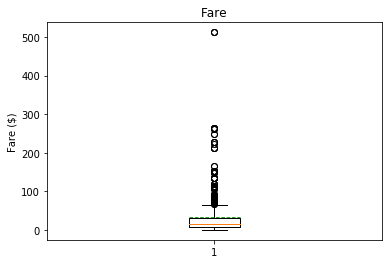

In [124]:
plt.boxplot(x=train_copy['Fare'],showmeans=True,meanline=True)
plt.title('Fare')
plt.ylabel("Fare ($)")

There seem to be a disproportional amount of high-paying passengers that skew the data

Text(0,0.5,'Age (years)')

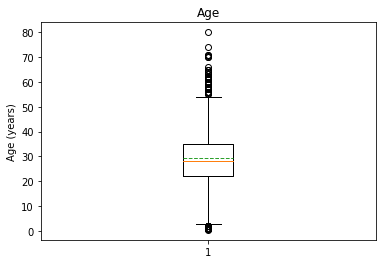

In [125]:
plt.boxplot(x=train_copy['Age'],showmeans=True,meanline=True)
plt.title('Age')
plt.ylabel('Age (years)')

The p50 age is more representative of the average age than the mean

Text(0,0.5,'FamilySize (#)')

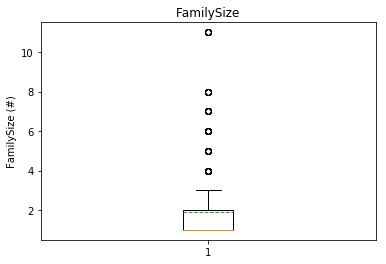

In [126]:
plt.boxplot(x=train_copy['FamilySize'],showmeans=True,meanline=True)
plt.title("FamilySize")
plt.ylabel("FamilySize (#)")

Similar to 'Age' and 'Fair' the 'FamilySize' seems to be artifically inflated due to large families

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


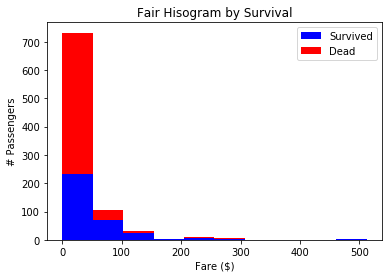

In [127]:
plt.hist(x=[train_copy[train_copy['Survived'] == 1]['Fare'], train_copy[train_copy['Survived'] == 0]['Fare']],
         stacked=True,
        color=['b','r'],
        label=['Survived','Dead'])

plt.title('Fair Hisogram by Survival')
plt.ylabel('# Passengers')
plt.xlabel('Fare ($)')

plt.legend()

Interestingly enough the the majority of those who survived paid the lowest for their time aboard the titanic. 

As expected the highest proportion of those 'Dead'  also rerpesented the lowest fair paid.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


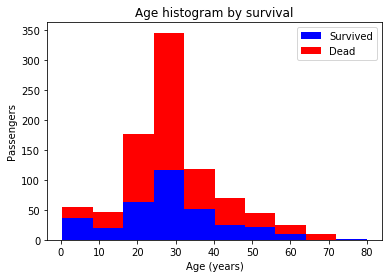

In [128]:
plt.hist(x=[train_copy[train_copy['Survived'] == 1]['Age'], train_copy[train_copy['Survived'] == 0]['Age']],
        stacked=True,
        color=['b','r'],
        label=['Survived','Dead'])


plt.title("Age histogram by survival")
plt.xlabel('Age (years)')
plt.ylabel("Passengers")

plt.legend()

"Age" seems to follow a normal curve in terms of those who 'survived' and 'died'. Could be attributed to the fact that 'Age' itself was normally distributed

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


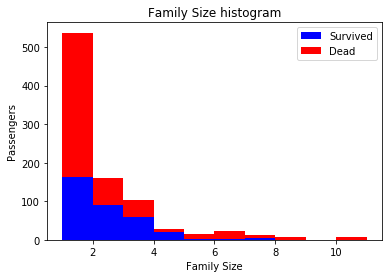

In [131]:
plt.hist(
                x=[train_copy[train_copy['Survived'] == 1]["FamilySize"],train_copy[train_copy['Survived'] == 0]['FamilySize']],
                stacked = True,
                color = ["b",'r'],
                label = ['Survived','Dead']
)

plt.title("Family Size histogram")
plt.ylabel("Passengers")
plt.xlabel("Family Size")

plt.legend()

Smaller families had a higher chance of surviving. Yet, this insight could also be fueled by the fact that the majority of families were small.

Larger families had the lowest chance of survival!

In [149]:
import seaborn as sns

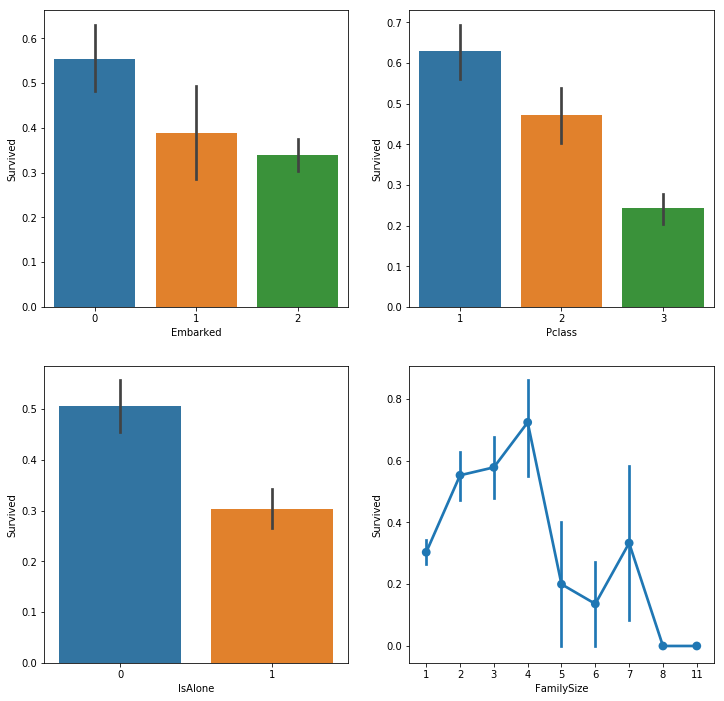

In [151]:
#init a (2,2) subplot where each subplot is (12,12)
fig, saxis = plt.subplots(2, 2,figsize=(12,12))

sns.barplot(x="Embarked",y="Survived",data=train_copy,ax = saxis[0,0])
sns.barplot(x="Pclass",y='Survived',data=train_copy,ax=saxis[0,1])
sns.barplot(x="IsAlone",y="Survived",data=train_copy,ax=saxis[1,0])
sns.pointplot(x="FamilySize",y="Survived",data=train_copy,ax=saxis[1,1])

(0,0 ) ~> It seems that "location 0" had the highest proportion of survivors.

(0,1) ~> As expected "first class passengers" have the highest proportion of survivors.

(1,0) ~> Families had a higher chance of surviving

(1,1) ~> Family with four or less members had the highest chances of survival


Let's dig a bit deeper into the statistics surrounding Location 0

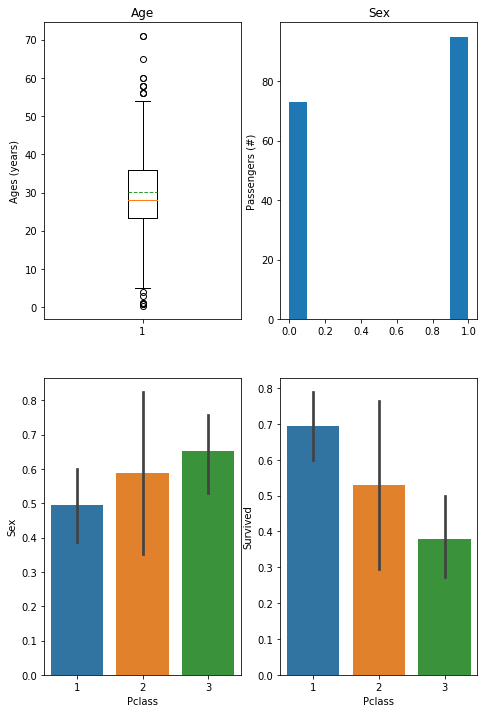

In [226]:
plt.figure(figsize=[12,12])

plt.subplot(231)
plt.boxplot(
                        x=[train_copy[train_copy['Embarked']==0]['Age']],
                        showmeans=True,
                        meanline=True,
           )
plt.title("Age")
plt.ylabel("Ages (years)")

plt.subplot(232)
plt.hist(
    x=[train_copy[train_copy["Embarked"] == 0 ]["Sex"] ],
)
plt.title("Sex")
plt.ylabel("Passengers (#)")

plt.subplot(234)
sns.barplot(x="Pclass",y="Sex",data=train_copy[train_copy["Embarked"] == 0])

plt.subplot(235)
sns.barplot(x="Pclass",y="Survived",data=train_copy[train_copy["Embarked"] == 0])


The majority of passengers embarking from location 0 were male, yet the majority of passengers embarking from location 0 in first class were female.

Unsurprisingly the highest proportion of passengers from first class survived.

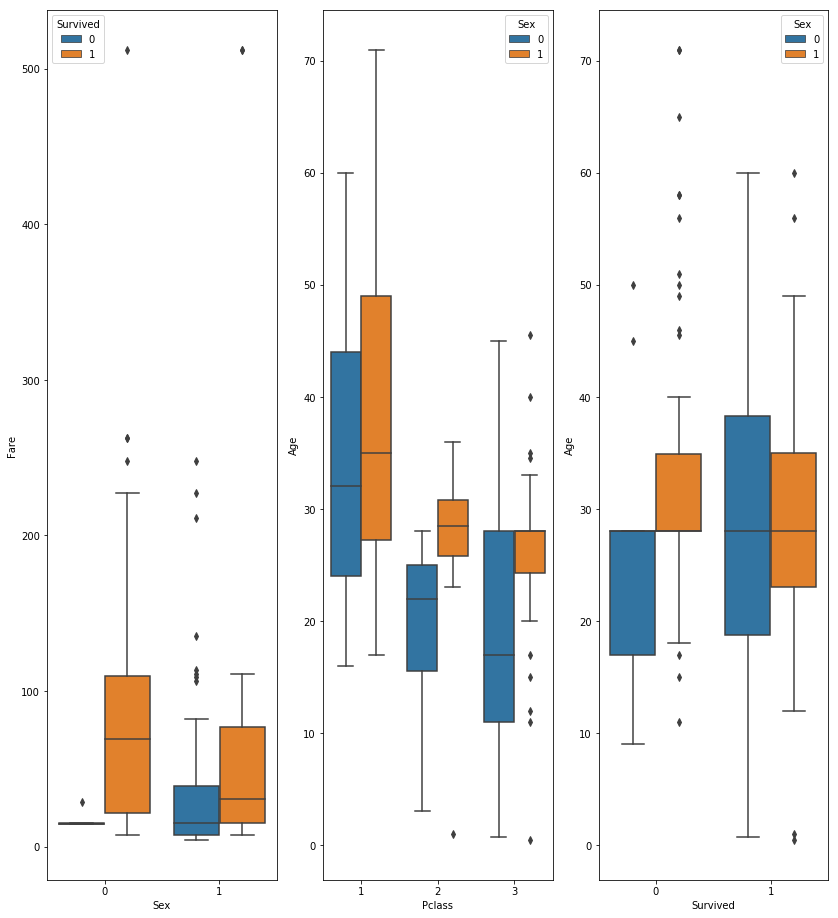

In [227]:
fig, axs = plt.subplots(1,3,figsize=(14,16))

sns.boxplot(x="Sex",y="Fare",hue="Survived",data=train_copy[train_copy["Embarked"] == 0],ax = axs[0])
sns.boxplot(x="Pclass",y="Age",hue='Sex',data=train_copy[train_copy["Embarked"] == 0],ax = axs[1])
sns.boxplot(x="Survived",y="Age",hue="Sex",data=train_copy[train_copy["Embarked"] == 0],ax=axs[2])

Those that survived paid significantly more than those that did not. Unsurprisingly, women paid significantly more to survive than men.

The difference in age of first class passengers seems to the be smallest, as opposed to a larger difference in age of passengers in second and third class.

It seems that older passengers were given priority over the younger passengers.


### Data Modelling

Let's find the labels that explain the most variation in the data set

In [233]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [234]:
std_transform = StandardScaler()

In [232]:
X_train_std = std_transform.fit_transform(X_train)

In [235]:
pca = PCA(n_components=3)

In [236]:
eigen_vals = pca.fit_transform(X_train_std)

In [237]:
print(eigen_vals)

[[ 0.4216818  -1.09948156 -0.64045618]
 [ 0.63423185  2.91507944  0.53789006]
 [-0.66449083 -1.17161817  0.91054863]
 ...
 [ 2.72913917 -0.77921544 -0.11960053]
 [-1.18756318  1.15516352  1.33116154]
 [-1.36999424 -0.61943299  0.15304958]]


In [ ]:
#convert to numpy.ndarrays
X_train = X_train.values
Y_train = Y_train.values

In [ ]:
acc_train_logreg = []

In [ ]:
acc_test_logreg = []

In [ ]:
c_logreg = [0.1,1,10,100,1000]

In [ ]:
def logreg_model(c, X_train, Y_train,penalty):
    '''
        Author: Kyle Ong
        Date: 05/13/2018
        
        fits a sklearn.linear_model.LogisticRegression(penalty = penalty, C=c, solver='saga')
        to X_train and Y_train
        
        c: type: float
        penalty: type: string
        X_train: type: numpy.ndarray
        Y_train: type: numpy.ndarray
    
    '''
    logreg = linear_model.LogisticRegression(penalty=penalty, C=c ,solver='saga')
    
    with warnings.catch_warnings():
        
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            logreg.fit(X_train,Y_train)
            
            y_hat = logreg.predict(X_train)
            acc_train = np.mean(Y_train == y_hat)
            print("This is the trainning accuracy with {} loss and {} c_val: {}".format(penalty,c, acc_train))
            
        except Warning as w:
            print(w)

In [ ]:
logreg_model(100,X_train,Y_train,"L1")

In [ ]:
def train_logistic_model_with(X_train,Y_train,params):
    '''
            Author: Kyle Ong
            Date: 05/12/2018
            
            will train sklearn.linear_model.LogisticRegression(penalty = penalty, C=c_val,solver='saga) over params
            
            X_train: type: numpy.ndarray
            Y_train: type: numpy.ndarray
            params: type: dict: {penalty:[c_vals]}
    '''
    for k,v in params.items():
        
        penalty = k
        acc_train_array = []

        for c_val in v:
            #this is baest coding skills
            log_model = 1
            if penalty.lower() == "l1" :
                log_model = linear_model.LogisticRegression(penalty=penalty, C=c_val,solver='saga')
            
            elif penalty.lower() == 'l2':
                log_model = linear_model.LogisticRegression( C=c_val)
                
            with warnings.catch_warnings():
                
                warnings.filterwarnings('ignore', category=ConvergenceWarning)
                
                try:
                     #fit the model
                    log_model.fit(X_train,Y_train)  
                    #train the model
                    Y_hat = log_model.predict(X_train)
            
                    train_acc = np.mean(Y_hat == Y_train)
            
                    acc_train_array.append(train_acc)
                    print("Accuracy with {} loss and c_val {} : {}".format(penalty,c_val,train_acc))
                
                except Warning as w:
                    print (w)
            

      
        

In [ ]:
params = {
    "L1":[0.1,1,10,100],
    "L2":[0.1,1,10,100]
         }

In [ ]:
train_logistic_model_with(X_train,Y_train,params)

In [ ]:
# apply feature transformations!
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
X_train_transformed = poly.fit_transform(X_train)
labels = X_train_transformed.shape[1]
observations = X_train_transformed.shape[0]

In [ ]:
print ("The transformed titanic dataset has {} observations.".format(observations))
print("The titanic dataset has {} labels".format(labels))

In [ ]:
train_logistic_model_with(X_train_transformed,Y_train,params)

In [ ]:
#split the trainning set into test and training set
split = math.floor(num_samples*0.5)

X_train_split = X_train[0 : split, :]
X_test_split = X_train[split: , :  ]
Y_train_split = Y_train[0:split]
Y_test_split = Y_train[split: ]

In [ ]:
X_train _split

In [ ]:
print("Training observations has shape: {}".format(X_train_split.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Testing observations has shape: {}".format(X_test_split.shape))

In [ ]:
def test_logistic_model_with(X_train,Y_train,X_test,Y_test,params):
    '''
            Author: Kyle Ong
            Date 05/13/2018
            
            trains and tests linear_model.LogisticRegression()
            
            X_train:type: numpy.ndarray
            Y_train: type: numpy.ndarray
            X_test: type: numpy.ndarray
            Y_test: type: numpy.ndarray
            params: type: dict {penalty : [c_val]}
    '''
    for k,v in params.items():
        
        penalty = k
        acc_train_array = []
        acc_test_arr = []

        for c_val in v:
            #this is baest coding skills
            log_model = 1
            if penalty.lower() == "l1" :
                log_model = linear_model.LogisticRegression(penalty=penalty, C=c_val,solver='saga')
            
            elif penalty.lower() == 'l2':
                log_model = linear_model.LogisticRegression( C=c_val)
               
            #uncoment context manager in order to get the convergence warning!
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore', category=ConvergenceWarning)
                try:
                     #fit the model
                    log_model.fit(X_train,Y_train)  
                
                    #train the model
                    Y_hat = log_model.predict(X_train)
                    train_acc = np.mean(Y_hat == Y_train)
                    acc_train_array.append(train_acc)
                    print("Training() ~> Accuracy with {} loss and c_val {} : \n{}".format(penalty,c_val,train_acc))
                
                    #test the model
                    Y_hat_test = log_model.predict(X_test)
                    acc_test =np.mean(Y_test == Y_hat_test)
                    acc_test_arr.append(acc_test)
                    print("Testing ~> Accuracy with {} loss and c_val {}: \n{}".format(penalty,c_val,acc_test))
                    
                
                except Warning as w:
                    print(w)
                    
        plt.plot(v,acc_test_arr)
        plt.xlabel('C values')
        plt.ylabel('Test accuracy')
                


In [ ]:
test_logistic_model_with(X_train_split,Y_train_split,X_test_split,Y_test_split,params)

In [ ]:
X_train_split_transformed = poly.fit_transform(X_train_split)
X_test_split_transformed = poly.fit_transform(X_test_split)

In [ ]:
print(X_train_split_transformed.shape)

In [ ]:
train_logistic_model_with(X_train_split_transformed,Y_train_split,params)

In [ ]:
test_logistic_model_with(X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,params)

In [ ]:
# let's try support vector machines!
from sklearn import svm

In [ ]:
def svm_linear(c,X_train,Y_train,X_test,Y_test):
    '''
            Author: Kyle Ong
            Date: 05/13/2018
            
            fits a svm.SVC(probability = False, kernel = 'linear', C = c) to X_train and Y_train
            calculates the training and test accuracies 
            
            c: type: int
            X_train: numpy.ndarray
            Y_train: numpy.ndarray
            X_test: numpy.ndarray
            Y_test: numpy.ndarray
            
            will ignore convergence warnings thrown by sklearn
    
    '''
    
    linear = svm.SVC(probability=False, kernel='linear',C=c)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        
        try:

            linear.fit(X_train,Y_train)
            
            Y_hat_train = linear.predict(X_train)
            train_acc =np.mean(Y_hat_train == Y_train)
            print("Training ~> This is the training accuracy with Linear kernel and c_val {}: {}".format(c,train_acc))
            
            
            Y_hat_test = linear.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            linear_test_acc.append(test_acc)
            print("Testing ~> This is the testing accuracy with Linear kernel and c_val {}:  {}".format(c,test_acc))
        
        except Warning as w:
            print(w)
            
            

In [ ]:
c_vals = [0.1,1,10,100]

In [ ]:
linear_test_acc = []
for c in c_vals:
    svm_linear(c,X_train_split,Y_train_split,X_test_split,Y_test_split)

In [ ]:
plt.plot(c_vals,linear_test_acc)
plt.xlabel("C values")
plt.ylabel("linear kernel test accuracies")

In [ ]:
linear_test_acc_ = []
for c in c_vals:
    svm_linear(c,X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split)

In [ ]:
def svm_rbf(c,X_train,Y_train,X_test,Y_test,gamma):
    '''
        Author: Kyle Ong
        Date: 05/13/2018
        
        will fit a svm.SVC(probability = False, kernel = 'rbf', gamma = gamma) to X_train and Y_train
        will calculate the train accuracy
        will calcuate the test accuracy
        
        c: type: int
        X_train: numpy.ndarray
        Y_train: numpy.ndarray
        X_test: numpy.ndarray
        Y_test: numpy.ndarray
        gamma: int
        
        will ignore convergence warnings thrown by sklearn    
    '''
    
    svm_rbf = svm.SVC(probability=False, kernel='rbf',gamma=gamma)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            svm_rbf.fit(X_train,Y_train)
            
            Y_hat_train = svm_rbf.predict(X_train)
            train_acc = np.mean(Y_hat_train == Y_train)
            print("This is the trainning accuracy with  Radial Basis Kernel and c_val {} and gamma {} : {}".format(c,gamma,train_acc))
            
            Y_hat_test = svm_rbf.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            print("This is the testing accuracy with  Radial Basis Kernel and c_val {} and gamma {} : {}".format(c,gamma,test_acc))
            rbf_test_acc.append(test_acc)
            
        except Warning as w:
            print(w)


In [ ]:
params = {
    0.1: [0.1,1,10,100],
    1 :  [0.1,1,10,100],
    10 :  [0.1,1,10,100],
    100 :  [0.1,1,10,100]
}

In [ ]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_split,Y_train_split,X_test_split,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

In [ ]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

In [ ]:
def svm_poly(X_train,Y_train,X_test,Y_test,c_val,degree):
    '''
        Author: Kyle Ong
        Date: 03/16/2018
        
        X_train : type: numpy.ndarray
        Y_train : type: numpy.ndarray
        X_test: type: numpy.ndarray
        Y_test: type: numpy.ndarray
        c_val : type: int
        degree : type: int
        
        will train a sklearn.svm.SVC(probability = False, kernel = "poly", degree=degree ) on X_train, Y_train
        will calculate accuracy for X_train and X_test
        will ignore convergence warnings thrown by sklearn
    '''
    
    svm_poly = svm.SVC(probability = False, kernel = "poly", C=c_val,degree=degree)
    svm_poly.fit(X_train,Y_train)
    
    with warnings.catch_warnings():
        
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            
            Y_hat_train = svm_poly.predict(X_train)
            train_acc = np.mean(Y_hat_train == Y_train)
            print("This is the trainning accuracy with polynomial kernel and {} degree and {} c_val: {}".format(degree,c_val,train_acc))
            
            Y_hat_test = svm_poly.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            print("This is the testing accuracy with polynomial kernel and {} degree and {} c_val: {}".format(degree,c_val,test_acc))
            
        except Warning as w:
            print(w)


In [ ]:
params = {
        1:[0.1,1,10,100],
        2:[0.1,1,10,100],
        3:[0.1,1,10,100]
}

In [ ]:
for k,v in params.items():
    d = k
    for c in v:
        svm_poly(X_train_split,Y_train_split,X_test_split,Y_test_split,c,d)

In [ ]:
for k,v in params.items():
    d = k
    for c in v:
        svm_poly(X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,c,d)